In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys
os.environ["MALLOC_TRIM_THRESHOLD_"] = '0'

import numpy as np
import xarray as xr
import xarray.ufuncs as xu
import xrft
import pandas as pd

from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy

from functionMaths import *

plt.rc("figure", figsize=(12,10))
plt.rc("font", size=14)

from dask.distributed import Client, LocalCluster
#
# Initialisation d'un cluster de 32 coeurs
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=4, protocol = 'tcp', host = '137.129.155.67')
client = Client(cluster)
client

/home/durandy/miniconda3/envs/towel/lib/python3.9/contextlib.py:126: UserWarning: Creating scratch directories is taking a surprisingly long time. This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://137.129.155.67:8787/status,
Dashboard: http://137.129.155.67:8787/status,Workers: 1
Total threads: 4,Total memory: 78.61 GiB
Status: running,Using processes: False
Comm: tcp://137.129.155.67:45991,Workers: 1
Dashboard: http://137.129.155.67:8787/status,Total threads: 4
Started: Just now,Total memory: 78.61 GiB
Comm: tcp://137.129.155.67:34445,Total threads: 4
Dashboard: http://137.129.155.67:33455/status,Memory: 78.61 GiB
Nanny: None,


In [2]:
wave = 'TCWV_Rossby'
indir_data = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/FILTERED_ANOMALY/TCWV/'
coeff = 1


In [3]:
ds = xr.open_mfdataset(indir_data + '*.nc', chunks = {'time' : 10}, parallel = True)
ds = ds.sel(lat = slice(29.5,-29.5))
ds = ds.isel(lat = slice(0,None,4), lon = slice(2,None,4)).persist()
ds

<xarray.Dataset>
Dimensions:      (time: 84736, lat: 60, lon: 360)
Coordinates:
  * time         (time) datetime64[ns] 1991-01-01 ... 2019-12-31T21:00:00
  * lat          (lat) float64 29.5 28.5 27.5 26.5 ... -26.5 -27.5 -28.5 -29.5
  * lon          (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    TCWV_Kelvin  (time, lat, lon) float64 dask.array<chunksize=(10, 60, 360), meta=np.ndarray>
    TCWV_Rossby  (time, lat, lon) float64 dask.array<chunksize=(10, 60, 360), meta=np.ndarray>
    TCWV_MJO     (time, lat, lon) float64 dask.array<chunksize=(10, 60, 360), meta=np.ndarray>
    TCWV_MRG     (time, lat, lon) float64 dask.array<chunksize=(10, 60, 360), meta=np.ndarray>
    TCWV_EIG     (time, lat, lon) float64 dask.array<chunksize=(10, 60, 360), meta=np.ndarray>
    TCWV_WIG     (time, lat, lon) float64 dask.array<chunksize=(10, 60, 360), meta=np.ndarray>
    TCWV_TD      (time, lat, lon) float64 dask.array<chunksize=(10, 60, 360), meta=np.ndarray>

In [4]:
ds_phase = xr.open_mfdataset('/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/ANALYSIS/PHASE/TEMP/*TCWV_Rossby.nc', chunks = {'time':10})
# ds_phase = xr.where(ds_phase['magnitude'] < 1, np.nan, ds_phase)
# ds_phase['vect_x'] = np.cos(ds_phase.amplitude) * ds_phase.magnitude
# ds_phase['vect_y'] = np.sin(ds_phase.amplitude) * ds_phase.magnitude
# ds_plot = ds_plot.chunk({'time' : 1, 'lat' : -1})
ds_phase

,Array,Chunk
Bytes,436.38 GiB,2.64 MiB
Shape,"(84736, 60, 360, 32)","(10, 3, 360, 32)"
Count,338980 Tasks,169480 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,436.38 GiB,2.64 MiB
Shape,"(84736, 60, 360, 32)","(10, 3, 360, 32)"
Count,338980 Tasks,169480 Chunks
Type,float64,numpy.ndarray


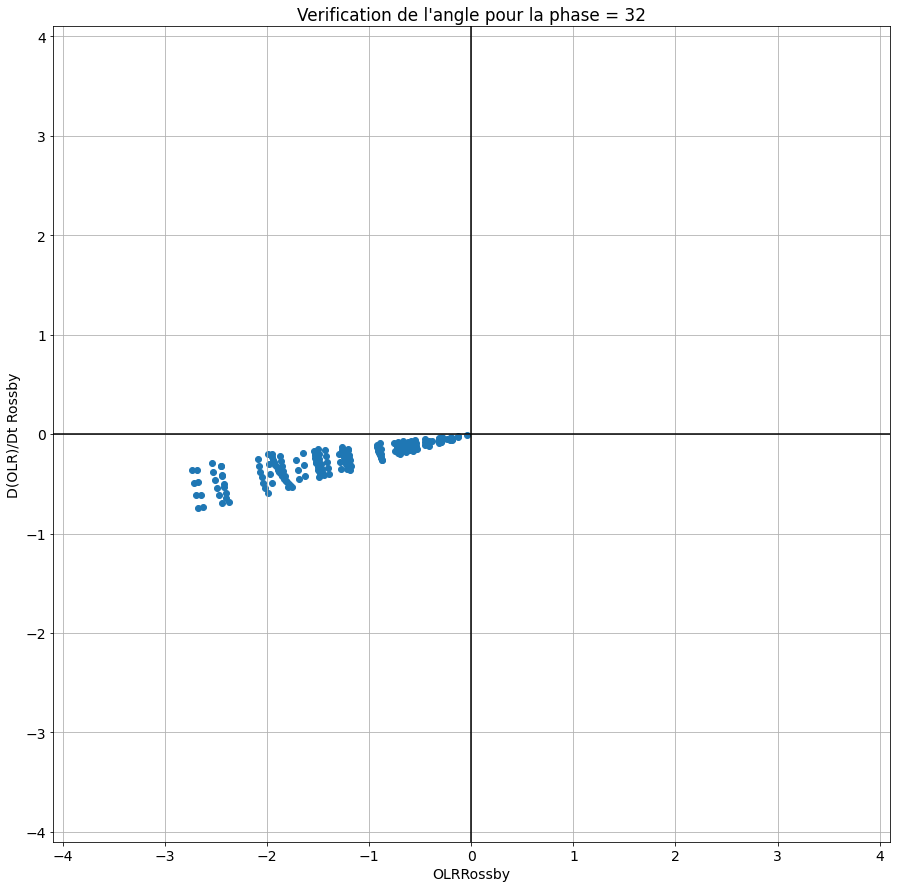

In [5]:
_wave = 'Rossby'
fig, axes = plt.subplots(figsize=(15,15))
# _ds_FILTER_mean = ds_FILTER_mean.sel(level = 850)
variable = ['MJO','TD','Kelvin','Rossby','MRG']
plt.rc("figure", figsize=(12,10))
# ds_norm.sel(lon = 140.5).plot.scatter(x = 'OLR_Kelvin', y = 'OLR_' + _wave + '_DT')
ds_plot.sel( phase = 31, lat=0.5, lon = 140.5, time = slice('2002','2003')).plot.scatter(x = 'vect_x', y = 'vect_y')
axes.set_ylabel('D(OLR)/Dt ' + _wave)
axes.set_xlabel('OLR' + _wave)
axes.hlines(0, -250, 100, colors = 'black')
axes.vlines(0, -55, 55, colors = 'black')
axes.set_title('Verification de l\'angle pour la phase = 32')
axes.set_xlim(-4.1,4.1)
axes.set_ylim(-4.1,4.1)
axes.grid()

In [ ]:
da = ds[wave] # .sel(time=ds.time.dt.month.isin([4, 5, 6]))
# for j in range(-20,20,2):
_ds_Test = ds_phase.sel(lat = 10, phase = 0, method = 'nearest')
del _ds_Test['lat']
_ds_Test = _ds_Test.expand_dims(lat = ds_phase['lat'], axis = 1)
_ds_Test = _ds_Test
# _ds_2 = xr.where(_ds_Test.isnull() != True,
#                          _ds['OLR_Kelvin'].isel(phase = 0), np.nan)
da_p = da.where(_ds_Test['amplitude'].isnull() != True)
da_m = da_p.mean(dim = ['time','lon']).load()
plt.figure()
da_m.plot()
# plt.title('lat 15')
plt.show()

In [ ]:
da = ds[wave] # .sel(time=ds.time.dt.month.isin([4, 5, 6]))
# for j in range(-20,20,2):
_ds_Test = ds_phase.sel(phase = 0, method = 'nearest')
# del _ds_Test['lat']
# _ds_Test = _ds_Test.expand_dims(lat = ds_plot['lat'], axis = 1)
_ds_Test = _ds_Test
# _ds_2 = xr.where(_ds_Test.isnull() != True,
#                          _ds['OLR_Kelvin'].isel(phase = 0), np.nan)
da_p = da.where(_ds_Test['amplitude'].isnull() != True)
da_m = da_p.mean(dim = ['time','lon']).load()
plt.figure()
da_m.plot()
# plt.title('lat 15')
plt.show()

In [ ]:
da = ds[wave] # .sel(time=ds.time.dt.month.isin([4, 5, 6]))
# for j in range(-20,20,2):
_ds_Test = ds_plot
da = da.expand_dims(phase = ds_phase['phase'], axis = 3)
# del _ds_Test['lat']
# _ds_Test = _ds_Test.expand_dims(lat = ds_plot['lat'], axis = 1)
_ds_Test = _ds_Test
# _ds_2 = xr.where(_ds_Test.isnull() != True,
#                          _ds['OLR_Kelvin'].isel(phase = 0), np.nan)
da_p = da.where(_ds_Test['amplitude'].isnull() != True)
da_m = da_p.mean(dim = ['time','lon']).load()
da_m = da_m.assign_coords(phase = ((da_m.phase + 24) % 32) - 24).sortby('phase')

positions = (-24, -16, -8, 0, 7)
labels = ("$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$" )

plt.figure()
da_m.plot.contourf(levels = 100)
plt.title('Composite onde de Rossby sans latitude de ref')
plt.xticks(positions, labels)
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/FIGURES/NAKAMURA/Composite_Rossby_TCWV_2D_LAT_NOREF.png')
plt.show()

In [ ]:
_ds_3 = ds[wave].expand_dims(phase = ds_phase['phase'], axis = 3)

_ds_Test = ds_phase['amplitude'].sel(lat = 10, method = 'nearest')
del _ds_Test['lat']
_ds_Test = _ds_Test.expand_dims(lat = ds['lat'], axis = 1)

_ds_3 = xr.where(_ds_Test.isnull() != True,
                         _ds_3, np.nan)
_ds_3 = _ds_3.mean(dim = ['time','lon']).compute()

ds_4 = _ds_3.assign_coords(phase = ((_ds_3.phase + 8) % 32) - 8).sortby('phase')
ds_4

positions = (-8, 0, 7, 15, 23)
labels = ("$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$" )

plt.figure()
ds_4.plot.contourf(levels = 100)
plt.title('composite TCWV Rossby avec lat ref = 10 °N')
plt.xticks(positions, labels)

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4100>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(990, 1000, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4100>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(1880, 1890, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (I

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4100>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(2860, 2870, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fa

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4100>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(2550, 2560, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4100>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(290, 300, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4100>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(870, 880, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4100>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(280, 290, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 2:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 2:
  #000: H5Dio.c line 179 in H5Dread(): can't read data


distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4100>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(930, 940, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fail

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4100>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(2500, 2510, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fa

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4100>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(1750, 1760, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fa

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 2:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 2:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4d40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(2350, 2360, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 2:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fa

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4d40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(1450, 1460, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fa

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4d40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(1110, 1120, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fa

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4d40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(1160, 1170, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fa

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4d40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(580, 590, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4d40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(410, 420, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 2:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 2:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4d40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(930, 940, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 2distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4d40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(1170, 1180, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

:
  #000: H5Dio.c line 179 

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4d40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(940, 950, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fail

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4d40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(1500, 1510, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fa

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4d40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(680, 690, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fail

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #0

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4d40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(2850, 2860, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fa

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 2:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4d40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(960, 970, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4d40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(770, 780, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data


HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 2:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4d40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(2310, 2320, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 2:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fa

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4d40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(1340, 1350, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f4d40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(1540, 1550, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 2:
  #000: H5Dio.c line 17

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f48c0>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(1580, 1590, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fa

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f48c0>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(2200, 2210, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fa

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 2:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #0

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f48c0>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(1110, 1120, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fa

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f48c0>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(930, 940, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fail

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f48c0>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(550, 560, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fail

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #0

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f48c0>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(1320, 1330, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fa

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 2:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f48c0>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(360, 370, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f48c0>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(260, 270, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 2:
  #000: H5Dio.c line 179 in

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f48c0>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(2910, 2920, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fa

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

distributed.worker - WARNING - Compute Failed
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x7f31ef5f48c0>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(1270, 1280, None), slice(42, 279, 4), slice(2, 1440, 4)))
kwargs:    {}
Exception: "RuntimeError('NetCDF: HDF error')"

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read fa

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #0

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3886 in H5D__chunk_lock(): memory allocation failed for raw data chunk
    major: Resource unavailable
    minor: No space available for allocation
distributed.worker - WARNING - Compute Failed
Function:  